In [1]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
import numpy as np

In [33]:
import svc
X, y = svc.loadTrainData()

e:\python36\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


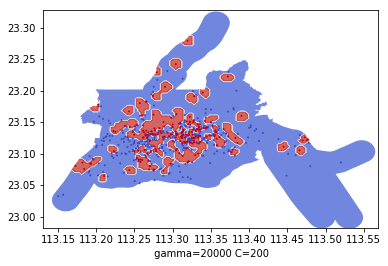

In [89]:
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import numpy as np
import csv
import matplotlib.pyplot as plt
import shapefile

sf = shapefile.Reader('范围/范围.shp')

fig = plt.figure()
ax = fig.add_subplot(111)

shape_rec = sf.shapeRecords()[-1]
vertices = []
codes = []
pts = shape_rec.shape.points
prt = list(shape_rec.shape.parts) + [len(pts)]
for i in range(len(prt) - 1):
    for j in range(prt[i], prt[i+1]):
        vertices.append((pts[j][0], pts[j][1]))
    codes += [Path.MOVETO]
    codes += [Path.LINETO] * (prt[i+1] - prt[i] -2)
    codes += [Path.CLOSEPOLY]
clip = Path(vertices, codes)
clip = PathPatch(clip, transform=ax.transData, edgecolor='k')

# X = np.array([[0,0],[0,1],[1,1],[1,0],[0.5,0.5],[0.35,0.35],[0.58,0.69],[0.25,0.41],[0.91,0.25],[1.5,1.5],[1.75,1.75],[1.65,1.24]])
# y = np.array([1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0])

x_min, x_max = X[:, 0].min() - 0.02, X[:, 0].max() + 0.05
y_min, y_max = X[:, 1].min() - 0.05, X[:, 1].max() + 0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max,0.003),
                     np.arange(y_min, y_max, 0.003))

# gamma, C = 2000, 30
# gamma, C = 5000, 10
# gamma, C = 8000, 10
gamma, C = 20000, 200
# gamma, C = 100000, 500
# gamma, C = 800000, 400

# for j, gamma in enumerate((10000, 8000)):
# for i, C in enumerate((10, 100, 1000)):
plt.subplot()       
clf = SVC(C=C, gamma=gamma)
clf.fit(X,y)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
cont = plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# cont = plt.contourf(xx, yy, Z, cmap=1, alpha=0.8)

for col in cont.collections:
    col.set_clip_path(clip)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel(" gamma=" + str(gamma) + " C=" + str(C))

#save result
figure_fig = plt.gcf()  # 'get current figure'
figure_fig.savefig('./result/result.eps', format='eps', dpi=1000)
figure_fig.savefig('./result/result.jpg', format='jpg', dpi=1000)
plt.show()

e:\python36\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


The parameters of the best model are: 
{'C': 400, 'gamma': 80000, 'kernel': 'rbf'}


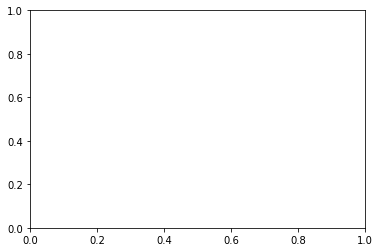

In [86]:
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import numpy as np
import csv
import matplotlib.pyplot as plt
import shapefile
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

sf = shapefile.Reader('范围/范围.shp')

fig = plt.figure()
ax = fig.add_subplot(111)

shape_rec = sf.shapeRecords()[-1]
vertices = []
codes = []
pts = shape_rec.shape.points
prt = list(shape_rec.shape.parts) + [len(pts)]
for i in range(len(prt) - 1):
    for j in range(prt[i], prt[i+1]):
        vertices.append((pts[j][0], pts[j][1]))
    codes += [Path.MOVETO]
    codes += [Path.LINETO] * (prt[i+1] - prt[i] -2)
    codes += [Path.CLOSEPOLY]
clip = Path(vertices, codes)
clip = PathPatch(clip, transform=ax.transData, edgecolor='k')

# X = np.array([[0,0],[0,1],[1,1],[1,0],[0.5,0.5],[0.35,0.35],[0.58,0.69],[0.25,0.41],[0.91,0.25],[1.5,1.5],[1.75,1.75],[1.65,1.24]])
# y = np.array([1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0])

x_min, x_max = X[:, 0].min() - 0.02, X[:, 0].max() + 0.05
y_min, y_max = X[:, 1].min() - 0.05, X[:, 1].max() + 0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max,0.003),
                     np.arange(y_min, y_max, 0.003))

parameters = {'kernel':('linear', 'rbf'), 'C':[400,500,600,1200], 'gamma':[80000]}
svr = SVC()
clf = GridSearchCV(svr, parameters, n_jobs=-1)
clf.fit(X, y)
# cv_result = pd.DataFrame.from_dict(clf.cv_results_)
# with open('cv_result.csv','w') as f:
#     cv_result.to_csv(f)
    
print('The parameters of the best model are: ')
print(clf.best_params_)

y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])

In [90]:
data = []
m,n = np.shape(Z)
for i in range(m):
    for j in range(n):
        tmp = []
        tmp.append(xx[i, j])
        tmp.append(yy[i, j])
        tmp.append(Z[i, j])
        data.append(tmp)
svc.saveResult(data)

In [67]:
np.shape(yy)

(116, 147)